# Performance Assessement

D206 Data Cleaning </br>
David Rusho </br>
Student ID: 012037553 </br>

---


## Import the Data


#### Install Python Libraries


In [218]:
# !pip3 install matplotlib
# !pip3 install missingno
# !pip3 install pandas
# !pip3 install prettytable
# !pip3 install scipy
# !pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 56.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.5 MB/s eta 0:00:00


#### Import Libaries


In [365]:
# Import Libraries
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import pandas as pd
import prettytable
from scipy import stats
import seaborn as sns
from sklearn.impute import SimpleImputer
import statistics

#### Load CSV into Pandas


In [2]:
# Increase column display/print range to display all columns
pd.set_option("display.max_columns", None)

# Specify the file path
file_path = "/Users/david/Documents/GitHub/WGU/d206 - Data Cleaning/Assessment/Medical Data and Dictionary Files/medical_raw_data.csv"

# Read the CSV file into a DataFrame
# First column of csv is already an index, set Pandas to not create an index  using 'index_col=0'
med_df = pd.read_csv(file_path, index_col=0)

# print first 3 rows
med_df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.40342,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.99812,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.19246,2,4,4,4,3,4,3,3


### Data Profiling


In [3]:
# Display dataframe datatypes and other basic info
med_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

### Function to Print Value Counts


In [4]:
# function to print value counts
def print_counts(df, column_name, max_rows=None):
    sorted_counts = df.sort_values(ascending=False)
    table = prettytable.PrettyTable(
        [column_name, "Count"])  # Create table with headers
    if max_rows:
        sorted_counts = sorted_counts.head(max_rows)
    for value, count in sorted_counts.items():
        table.add_row([value, count])
    return table

---

## Data Cleaning


### Detecting and Treat Duplicates


#### Detect Duplicates


In [5]:
str(med_df)

"       CaseOrder Customer_id                           Interaction  \\\n1              1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   \n2              2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   \n3              3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   \n4              4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   \n5              5     C544523  5885f56b-d6da-43a3-8760-83583af94266   \n...          ...         ...                                   ...   \n9996        9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   \n9997        9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   \n9998        9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   \n9999        9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   \n10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   \n\n                                    UID          City State        County  \\\n1      3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL      

In [213]:
# Determine duplicate count of dataframe
# Resource: https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/
dup_count = med_df.duplicated().value_counts()

# value counts of duplicates in descending order
print("Duplicate Count")
print_counts(dup_count, "duplicates")

Duplicate Count


duplicates,Count
False,10000


#### Drop Duplicates


In [7]:
# Create a copy of the original dataframe
df_dup_drop = med_df.copy()

# Determine duplicate count of new dataframe copy
# Resource: https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/
df_dup_drop = med_df.drop_duplicates()
dup_count2 = df_dup_drop.duplicated().value_counts()

# value counts of duplicates in descending order
print("Duplicate Count After Duplicates Dropped")
print_counts(dup_count2, "duplicates")

Duplicate Count After Duplicates Dropped


duplicates,Count
False,10000


### Detection and Teatment of Missing Values

_Missing values are usually represented in a form of Nan or null or None in the dataset_


#### Display nulls in dataframe


In [159]:
# nulls in dataframe
df_dup_drop.isnull().head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Count Nulls


In [8]:
# count nulls by column
df_isnull = df_dup_drop.isnull().sum(axis=0)

# value counts of nulls in descending order
print("Null Counts by Column Name, Ordered by Counts In Descending Order")
print_counts(df_isnull, "Name", 10)  # .plot(kind="barh")

Null Counts by Column Name, Ordered by Counts In Descending Order


Name,Count
Children,2588
Soft_drink,2467
Income,2464
Age,2414
Initial_days,1056
Anxiety,984
Overweight,982
Complication_risk,0
Arthritis,0
Diabetes,0


#### Visualizing the dataset with missingno

Resource: https://github.com/ResidentMario/missingno

Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. Just pip install missingno to get started.


##### Missingo Matrix

Resource: https://github.com/ResidentMario/missingno

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.


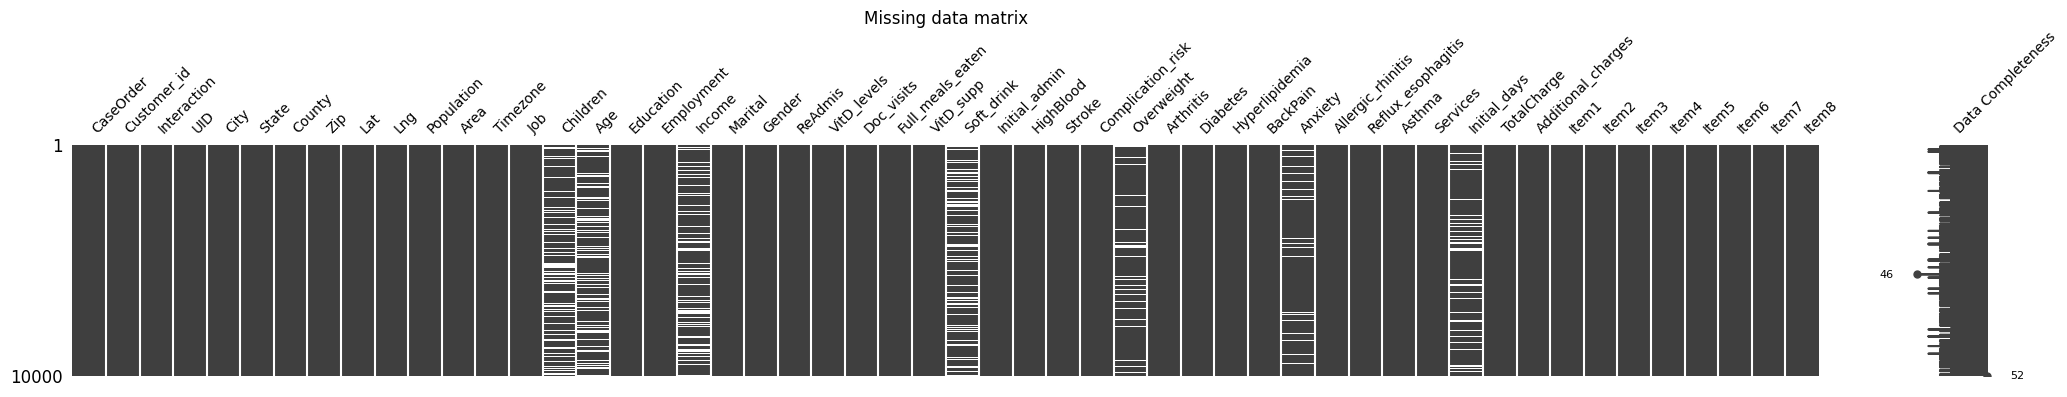

In [160]:
# visualize missing values with missingno
msno.matrix(df_dup_drop, fontsize=10, labels=True,
            figsize=(25, 3))  # show headers
plt.title("Missing data matrix")
plt.show()

##### Isolate missing data columns


In [167]:
# missing values columns list
missing_values_columns = df_dup_drop.columns[df_dup_drop.isnull().any()].tolist()

# order by name
sorted(missing_values_columns)

['Age',
 'Anxiety',
 'Children',
 'Income',
 'Initial_days',
 'Overweight',
 'Soft_drink']

##### Missingo Bar Chart

_Filtered for columns with missing data only_


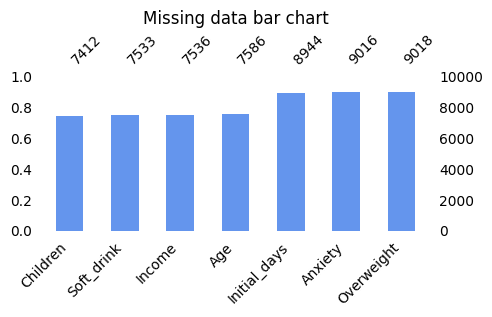

In [168]:
# missingno bar chart of only missing value columns
msno.bar(
    df_dup_drop[missing_values_columns],
    fontsize=10,
    figsize=(5, 2),
    color="#6495ED",
    sort="ascending",
)
plt.title("Missing data bar chart")
plt.show()

### Dealing With Missing Data


#### Imputation

_Replace the missing data with some substite value to retain most of the data/information of the dataset_

Can include:

- Univariate Statistical Imputation (Mean, Median, Mode)
- Backward/Forward Fill
- Mutliple Imputation by Chained Equations (MICE) (usually for R)
- Interative Imputer (usually for Python)
- K-Nearest Neighbor (KNN) Imputation


#### Univariate Imputation: Examine Distribution

- Histogram (plot the distibution of numeric varariable's values as a series of bars)
- Checking for skewness and/or symmetry


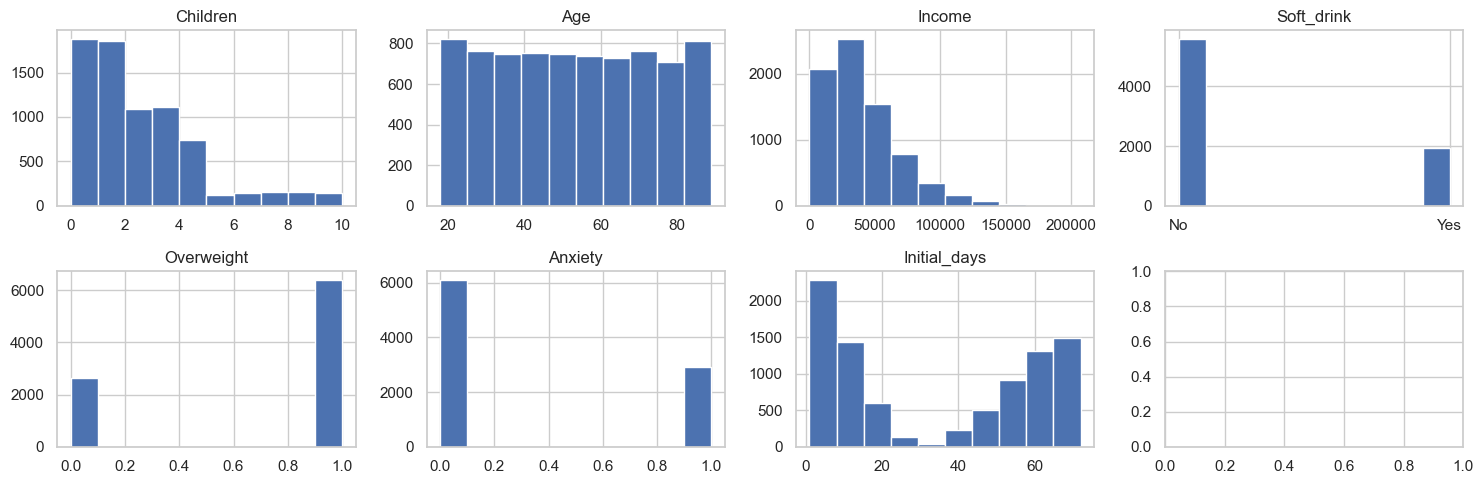

In [288]:
# Set figure size with 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

# Create histograms for each column with missing values
for i, col in enumerate(missing_values_columns):
    row, col_index = divmod(i, 4)  # row and column index for subplot
    df_dup_drop[col].hist(ax=axes[row, col_index])
    axes[row, col_index].set_title(col)  # title for each subplot

# print all histograms
plt.tight_layout()

#### Cleaning: 'Initial_days'

This column does not have a obvious distribution shape.  
Values seem to represent hours and minutes translated into a float datatype.  
However, most concerning is the fact that there are no values present that are below 1. If a patient was not at the hospital for less than a 24 hour period they are not represented in the dataset. It can be assumed that many of the null valus are in fact values that represent a patient staying at the hospital for less than a day. The values for patient time in and time out of the hostital are unknown. Null values for this column will be converted to 0 values.


In [272]:
print("Initial_days null counts")
id_null_counts = df_dup_drop["Initial_days"].isnull().value_counts()

print_counts(id_null_counts, "Initial_days")

Initial_days null counts


Initial_days,Count
False,8944
True,1056


In [274]:
# create a df copy to keep dataframe(s) immutable
df_clean_initial_days = df_dup_drop.copy()

# fillna values with value of 0 and set datatype to int
df_clean_initial_days["Initial_days"] = df_clean_initial_days["Initial_days"].fillna(
    0)

id_new_null_counts = df_clean_initial_days["Initial_days"].isnull(
).value_counts()

print("Initial_days null counts after replacing nulls")
print_counts(id_new_null_counts, "Initial_days")

Initial_days null counts after replacing nulls


Initial_days,Count
False,10000


<Axes: >

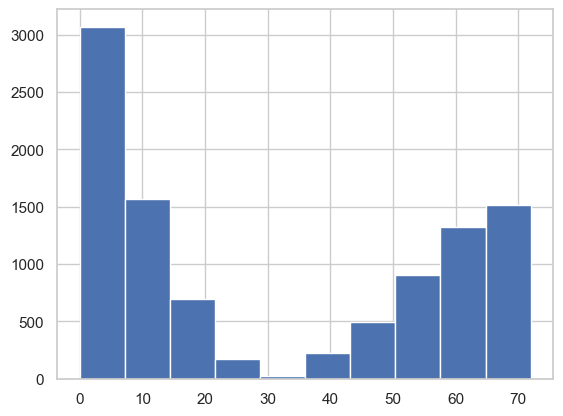

In [282]:
# verify distribution after imputation
df_clean_initial_days["Initial_days"].hist()

#### Cleaning: Categorical Column Types

- Soft_drink - will require ordinal encoding, tranform to numerical value (yes,no = 1,0)
- Overweight
- Anxiety


In [305]:
# create a df copy to keep dataframe(s) immutable
df_clean_categories = df_clean_initial_days.copy()
cat_cols = ["Soft_drink", "Overweight", "Anxiety"]

# Convert columns to boolean datatype
df_clean_categories[cat_cols] = df_clean_categories[cat_cols].astype("bool")

cat_null_counts = df_clean_categories[cat_cols].isnull().sum(axis=0)

# value counts of nulls in descending order
print("Category Columns' Null Counts Ordered by Counts In Descending Order")
print_counts(cat_null_counts, "Name", 10)  # .plot(kind="barh")

Category Columns' Null Counts Ordered by Counts In Descending Order


Name,Count
Soft_drink,0
Overweight,0
Anxiety,0


#### Clean: "Age"


In [347]:
# create a df copy to keep dataframe(s) immutable
df_clean_age = df_clean_categories.copy()

# fill Age null values with mean value since the distribution is Uniform
df_clean_age["Age"] = df_clean_age["Age"].fillna(df_clean_age["Age"].mean())

# count null values for "Age" column
df_null_age_counts = df_clean_age["Age"].isnull().value_counts()
print_counts(df_null_age_counts, "Age")

Age,Count
False,10000


<Axes: >

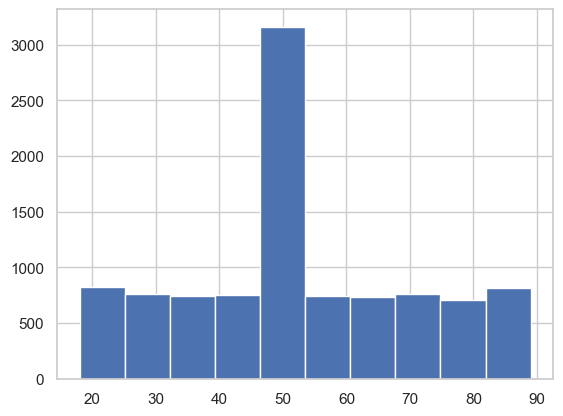

In [348]:
# verify distribution after imputation
df_clean_age["Age"].hist()

In [376]:

# Verify "Age" imputation by comparing median before and after imputation
print('Median Age After Imputation')
print(f"{df_clean_age[["Age"]].median()}\n")

# compare to data before imputation
print('Median Age Before Imputation')
print(df_dup_drop[['Age']].median())

Median Age After Imputation
Age    53.295676
dtype: float64

Median Age Before Imputation
Age    53.0
dtype: float64


#### Clean: "Children" and "Income"

_Both columns are left skewed and should be treated by filling in null values with the mean._


In [352]:
# create a df copy to keep dataframe(s) immutable
df_clean_mean_vars = df_clean_age.copy()
mean_cols = ["Children", "Income"]

for col in mean_cols:
    df_clean_mean_vars[col] = df_clean_mean_vars[col].fillna(
        df_clean_mean_vars[col].mean()
    )

# count nulls by column
df_nulls_counts = df_clean_mean_vars.isnull().sum(axis=0)

# value counts of nulls in descending order
print("Null Counts by Column Name, Ordered by Counts In Descending Order")
print_counts(df_nulls_counts, "Name", 10)  # .plot(kind="barh")

Null Counts by Column Name, Ordered by Counts In Descending Order


Name,Count
CaseOrder,0
Customer_id,0
HighBlood,0
Stroke,0
Complication_risk,0
Overweight,0
Arthritis,0
Diabetes,0
Hyperlipidemia,0
BackPain,0


<Axes: >

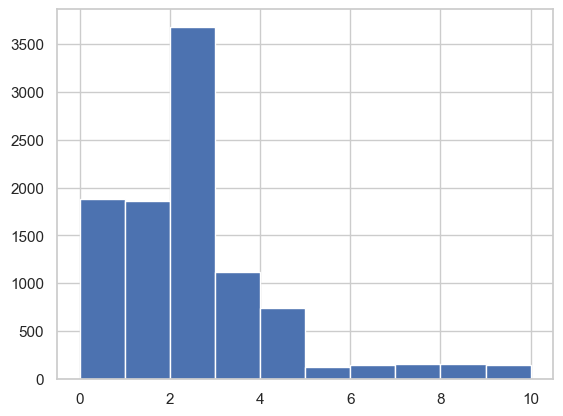

In [355]:
# verify distribution after imputation
df_clean_mean_vars["Children"].hist()
plt.show()

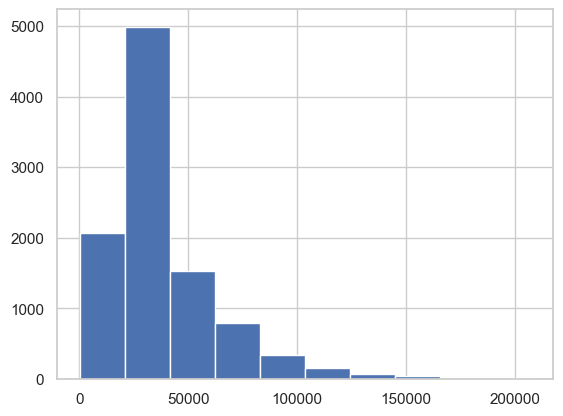

In [356]:
# verify distribution after imputation
df_clean_mean_vars["Income"].hist()
plt.show()

#### Univariate Imputation: Perform Imputation

- Mean: Normal/Uniform Distrubution
- Median: Skewed (Right or Left); Bi-modal distrubution
- Mode: Categorical/Nominal Variables (character/string/Boolean); Bi-modal distrubution


#### Univariate Imputation: Verification

- Verify if the missing values are resolved and that distrubution is in relative alignment with the distrubution prior to imputation


## Initial Analysis of the Data


### Verify Unique Value Counts

**Columns that should have unqie values per row**

| name        | requied to be unique | description                                                            |
| :---------- | :------------------- | :--------------------------------------------------------------------- |
| CaseOrder   | Yes                  | Original index for dataframe                                           |
| Customer_id | Yes                  | Unique patient ID                                                      |
| Interaction | Yes                  | Unique IDs related to patient transactions, procedures, and admissions |
| UID         | Yes                  | Unique IDs related to patient transactions, procedures, and admissions |

</br>

**Columns that have a high likihood of returning unique values per row**</br>
_Not a requirement of the data cleaning process_
| name | requied to be unique | description |
|:-- |:-- | :-- |
|VitD_levels| No | Patient’s vitamin D levels as measured in ng/mL. |
|TotalCharge| No | The amount charged to the patient daily. |


In [216]:
# Verify unique values count by all columns

# dataframe columns to list
df_cols_list = med_df.columns.to_list()

# count unique values per column,
unique_count = med_df[df_cols_list].nunique()

# print table, limit results to top 10
create_pt(unique_count, "Name", 15)

Name,Count
CaseOrder,10000
VitD_levels,10000
Customer_id,10000
TotalCharge,10000
Interaction,10000
UID,10000
Initial_days,8944
Additional_charges,8888
Zip,8612
Lng,8601


### Verify categorical columns values

_These columns should return values that are limited in count, and are not unique per row_

- Area
- Timezone
- Education
- Employment
- Marital
- Gender
- Initial_admin
- Complication_risk
- Services
- Item1
- Item2
- Item3
- Item4
- Item5
- Item6
- Item7
- Item8


In [197]:
# Verify value counts for all three categorical columns
for col in [
    "Area",
    "Timezone",
    "Education",
    "Employment",
    "Marital",
    "Gender",
    "Initial_admin",
    "Complication_risk",
    "Services",
    "Item1",
    "Item2",
    "Item3",
    "Item4",
    "Item5",
    "Item6",
    "Item7",
    "Item8",
]:
    value_counts = med_df[col].value_counts()

    print(f"Value Counts for '{col}':")
    # print(value_counts)
    print(create_pt(value_counts, "Name"))
    print()

Value Counts for 'Area':
+----------+-------+
|   Name   | Count |
+----------+-------+
|  Rural   |  3369 |
| Suburban |  3328 |
|  Urban   |  3303 |
+----------+-------+

Value Counts for 'Timezone':
+--------------------------------+-------+
|              Name              | Count |
+--------------------------------+-------+
|        America/New_York        |  3889 |
|        America/Chicago         |  3771 |
|      America/Los_Angeles       |  937  |
|         America/Denver         |  612  |
|        America/Detroit         |  262  |
|  America/Indiana/Indianapolis  |  151  |
|        America/Phoenix         |  100  |
|         America/Boise          |   86  |
|       America/Anchorage        |   50  |
|      America/Puerto_Rico       |   43  |
|        Pacific/Honolulu        |   34  |
|       America/Menominee        |   14  |
|          America/Nome          |   12  |
|   America/Indiana/Vincennes    |   8   |
|  America/Kentucky/Louisville   |   6   |
|         America/Sitka 

In [188]:
# print value counts for Area column
area_counts = med_df["Area"].value_counts()
create_pt(area_counts, "Area")

Area,Count
Rural,3369
Suburban,3328
Urban,3303


In [189]:
# print value counts for Timezone column
tz_counts = med_df["Timezone"].value_counts()
create_pt(tz_counts, "Timezone")

Timezone,Count
America/New_York,3889
America/Chicago,3771
America/Los_Angeles,937
America/Denver,612
America/Detroit,262
America/Indiana/Indianapolis,151
America/Phoenix,100
America/Boise,86
America/Anchorage,50
America/Puerto_Rico,43


### Verify datatype Int64 columns

- Children
- Age
-
